In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
hd = pd.read_csv("heart.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##Data visualisation

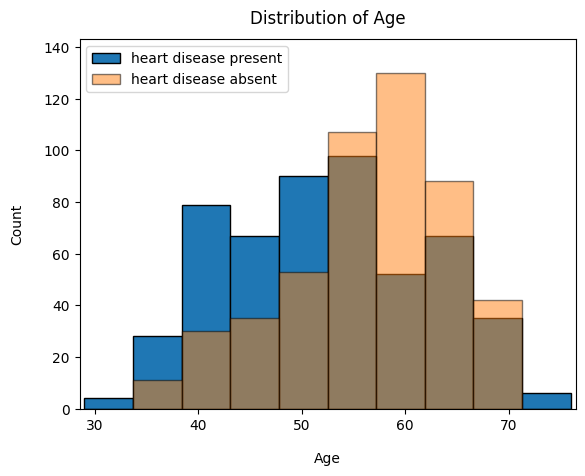

In [31]:
#Distribution of age
pres_hd = hd[hd['target'] == 1]
abs_hd = hd[hd['target'] == 0]
values, bins, bars = plt.hist(x="age", data=pres_hd, edgecolor = "black")
plt.hist(x="age", data=abs_hd, edgecolor = "black", alpha = 0.5, bins =bins)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Distribution of Age", y=1.02);
#plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)
plt.legend(['heart disease present', 'heart disease absent'], loc='upper left')

From this histogram, there is no clear correlation between age and presence of heart disease.

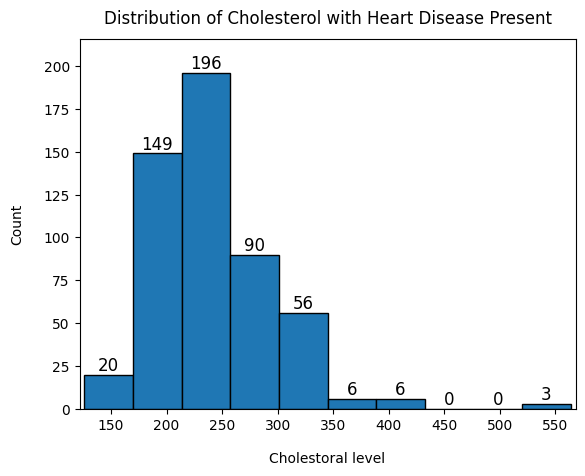

In [34]:
values, bins, bars = plt.hist(x="chol", data=pres_hd, edgecolor = "black")
plt.xlabel("Cholestoral level", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Distribution of Cholesterol with Heart Disease Present", y=1.02);
plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)

The normal level for cholesterol is under 200 mg/dL, with borderline high being from 200 to 239 mg/dL ahd high being at or above 240 mg/dL. From this graph, there are more patients with heart disease present if the cholesterol levels are borderline high or high.

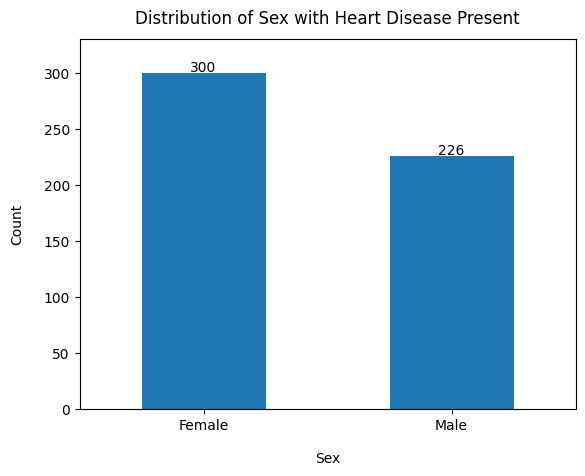

In [61]:
ax = pres_hd['sex'].value_counts().plot(kind='bar')
plt.xlabel("Sex", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Distribution of Sex with Heart Disease Present", y=1.02);
plt.margins(x=0.01, y=0.1)
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation = 0)
for p in ax.patches:
  ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.005), ha='center')

From the barchart, there are more females with heart disease than male.

##Model training

In [22]:
X = hd.drop(columns = ["target"])
y = hd["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lr = LogisticRegression(max_iter=10000, solver="liblinear", penalty="l1")
pipeline_lr = Pipeline([("logistic_regression", LogisticRegression(max_iter=10000, solver="liblinear", penalty="l1"))])

In [24]:
def show_cv_results(pipeline):
  scores = cross_validate(pipeline, X_train, y_train, cv=10, return_train_score=True)
  print("Mean test score:", scores["test_score"].mean())
  display(pd.DataFrame(scores))

show_cv_results(pipeline_lr)

Mean test score: 0.8597560975609756


,fit_time,score_time,test_score,train_score
0,0.026786,0.004654,0.865854,0.871274
1,0.057900,0.003762,0.865854,0.868564
2,0.033543,0.003926,0.853659,0.872629
3,0.040259,0.004117,0.853659,0.871274
4,0.036674,0.003804,0.914634,0.869919
5,0.038191,0.003728,0.902439,0.871274
6,0.031275,0.003751,0.902439,0.869919
7,0.037513,0.003762,0.841463,0.864499
8,0.045155,0.003821,0.817073,0.871274
9,0.042426,0.003896,0.780488,0.876694


In [25]:
grid_lr = {
    "logistic_regression__C": [0.01, 0.1, 1, 100, 1000]
}

gs_lr = GridSearchCV(pipeline_lr, grid_lr)
gs_lr.fit(X_train, y_train)

# helper function to view grid search results

def report_GridSearchCV_results(gs):
    print("Best combination of hyperparams:\n", gs.best_params_, "\n")
    print("Best mean_test_score score:\n", gs.best_score_, "\n")
    
    scores = []
    for i in range(gs.n_splits_):
        scores.append(gs.cv_results_['split{}_test_score'.format(i)][gs.best_index_])
    print("Score by fold for best estimator:\n", scores, "\n")
    
    # View top 5 hyperparams combinations by mean_test_score (mean on "validation" set)
    print("Top 5 hyperparams combinations by mean_test_score:")
    display(pd.DataFrame(gs.cv_results_)[["rank_test_score", "mean_test_score"] 
                                            + ["param_" + param for param in gs.param_grid]]\
              .sort_values(by = "mean_test_score", ascending = False)\
              .set_index("rank_test_score").head(5))


report_GridSearchCV_results(gs_lr)

Best combination of hyperparams:
 {'logistic_regression__C': 1} 

Best mean_test_score score:
 0.8548780487804878 

Score by fold for best estimator:
 [0.8414634146341463, 0.8536585365853658, 0.9085365853658537, 0.8719512195121951, 0.7987804878048781] 

Top 5 hyperparams combinations by mean_test_score:


,mean_test_score,param_logistic_regression__C
rank_test_score,,
1,0.854878,1
2,0.848780,100
2,0.848780,1000
4,0.843902,0.1
5,0.704878,0.01


In [26]:
# Further tuning hyperparameters based on results of first grid search

grid2_lr = {
    "logistic_regression__C": np.arange(0.5, 1.5, 0.1)
}

gs2_lr = GridSearchCV(pipeline_lr, grid2_lr)
gs2_lr.fit(X_train, y_train)

report_GridSearchCV_results(gs2_lr)

Best combination of hyperparams:
 {'logistic_regression__C': 1.1999999999999997} 

Best mean_test_score score:
 0.8585365853658538 

Score by fold for best estimator:
 [0.8475609756097561, 0.8536585365853658, 0.9146341463414634, 0.8719512195121951, 0.8048780487804879] 

Top 5 hyperparams combinations by mean_test_score:


,mean_test_score,param_logistic_regression__C
rank_test_score,,
1,0.858537,1.2
2,0.857317,1.1
2,0.857317,1.3
2,0.857317,1.4
5,0.854878,0.9


              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



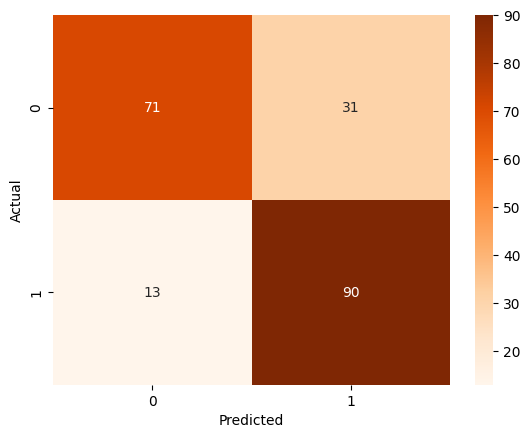

In [27]:
# Performance on the test set

def score_model(model, x, y):
    pred = model.predict(x)
    print(classification_report(y, pred))

    cm = confusion_matrix(y, pred)
    columns = np.unique(y)
    df_cm = pd.DataFrame(cm, index=columns, columns=columns)
    ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

score_model(gs2_lr, X_test, y_test)

In [28]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.890
Accuracy score (validation): 0.839
Learning rate:  0.075
Accuracy score (training): 0.890
Accuracy score (validation): 0.839
Learning rate:  0.1
Accuracy score (training): 0.888
Accuracy score (validation): 0.834
Learning rate:  0.25
Accuracy score (training): 0.906
Accuracy score (validation): 0.863
Learning rate:  0.5
Accuracy score (training): 0.911
Accuracy score (validation): 0.849
Learning rate:  0.75
Accuracy score (training): 0.912
Accuracy score (validation): 0.829
Learning rate:  1
Accuracy score (training): 0.927
Accuracy score (validation): 0.868


In [29]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)


print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       102
           1       0.79      0.91      0.85       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



The model has high precision, high recall and high f1-score.  
In the case of predicting presence of heart disease, I feel that recall is more important factor than precision, since it is better to identify a person without heart disease as one with heart disease rather than the other way round. 